> # **TensorFlow  2.1.0** - ***02*** - *Redes Neurais Convolucionais*

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from tensorflow.keras.datasets import cifar10 # https://www.cs.toronto.edu/~kriz/cifar.html

TensorFlow 2.x selected.


In [2]:
# Separando base de dados
(x_training, y_training), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(' - Shapes:')
print(f'x_training.shape -> {x_training.shape}')
print(f'x_test.shape -> {x_test.shape}')
print(f'y_training.shape -> {y_training.shape}')
print(f'y_test.shape -> {y_test.shape}', end='\n'*2)
print(f' - Dado:\nx_training[0] ->\n{x_training[0]}', end='\n'*2)
print(f' - Dado:\nnp.unique(y_training) -> {np.unique(y_training)}', end='\n'*2)
print(f' - Nome das classes -> {class_names}')

 - Shapes:
x_training.shape -> (50000, 32, 32, 3)
x_test.shape -> (10000, 32, 32, 3)
y_training.shape -> (50000, 1)
y_test.shape -> (10000, 1)

 - Dado:
x_training[0] ->
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

 - Dado:
np.unique(y_training) -> [0 1 2 3 4 5 6 7 8 9]

 - Nome das classes -> ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
# Normalizando base de dados (Dividimos cada elemento(pixel) da base de dados por 255(maior valor de um pixel de uma imagem) para obter valores entre 0 e 1
print(' - Normalizando base de dados\n...')
x_training = x_training / 255.0
x_test = x_test / 255.0
print(f' - Dado normalizado:\nx_training[0] ->\n{x_training[0]}')

 - Normalizando base de dados
...
 - Dado normalizado:
x_training[0] ->
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [

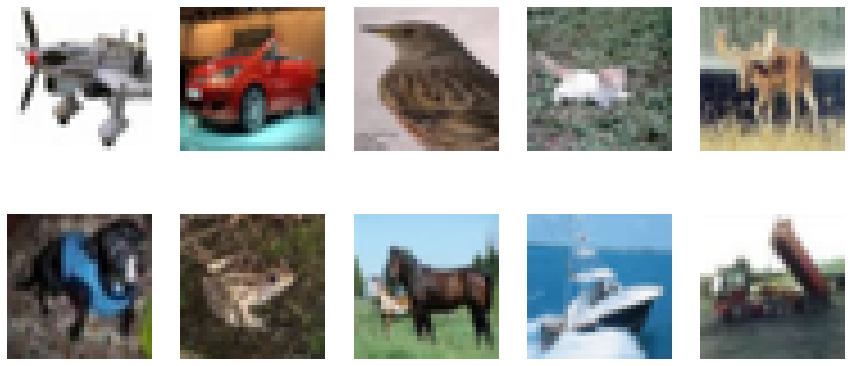

In [5]:
# Exemplo da base de dados
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axs = list(axs)
#    classes 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
img_indexs = [49,45,18,39,28,27,22,12,8,2] 

index = 0
for line_axs in axs:
  for i in range(len(line_axs)):
    ax = line_axs[i]
    ax.imshow(x_training[img_indexs[index]].reshape((32,32, 3)))
    ax.axis('off')
    index += 1

In [6]:
# Construindo a rede neural
neuronios_entrada = (32, 32, 3)
neuronios_oculta = 128
neuronios_saida = 10

# Criando o modelo
model = tf.keras.models.Sequential()
# Camadas de Convolução e MaxPooling 
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, padding= 'same', activation= 'relu', input_shape= neuronios_entrada)) # Convoluçao 1
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, padding= 'same', activation= 'relu')) # Convoluçao 2
model.add(tf.keras.layers.MaxPooling2D(pool_size= 2, strides= 2, padding='valid')) # MaxPolling 1
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, padding= 'same', activation= 'relu')) # Convoluçao 3
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, padding= 'same', activation= 'relu')) # Convoluçao 4
model.add(tf.keras.layers.MaxPooling2D(pool_size= 2, strides= 2, padding='valid')) # MaxPolling 2
# Camada de Flatting
model.add(tf.keras.layers.Flatten())
# Camada de entrada
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units= neuronios_oculta, activation= 'relu'))
model.add(tf.keras.layers.Dense(units= neuronios_oculta, activation= 'relu'))
# Camada de saida
model.add(tf.keras.layers.Dense(units= neuronios_saida, activation= 'softmax'))

print(' - Resumo do modelo')
model.summary()

 - Resumo do modelo
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 

In [7]:
# Compilando modelo
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy'])

# Treinamento do modelo
print(' - Treinamento do modelo')
model.fit(x_training, y_training, epochs= 10)

 - Treinamento do modelo
Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 258us/sample - loss: 1.4327 - sparse_categorical_accuracy: 0.4725
Epoch 2/10
50000/50000 [==============================] - 6s 121us/sample - loss: 0.9574 - sparse_categorical_accuracy: 0.6590
Epoch 3/10
50000/50000 [==============================] - 6s 123us/sample - loss: 0.7823 - sparse_categorical_accuracy: 0.7222
Epoch 4/10
50000/50000 [==============================] - 6s 129us/sample - loss: 0.6682 - sparse_categorical_accuracy: 0.7629
Epoch 5/10
50000/50000 [==============================] - 6s 125us/sample - loss: 0.5813 - sparse_categorical_accuracy: 0.7947
Epoch 6/10
50000/50000 [==============================] - 6s 124us/sample - loss: 0.5020 - sparse_categorical_accuracy: 0.8224
Epoch 7/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.4417 - sparse_categorical_accuracy: 0.8439
Epoch 8/10
50000/50000 [==============================] - 6s 1

In [8]:
# Avaliando o modelo
print(' - Avaliando o modelo')
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Taxa de acerto -> {test_accuracy}')

 - Avaliando o modelo
10000/10000 [==============================] - 1s 105us/sample - loss: 0.9721 - sparse_categorical_accuracy: 0.7373
Taxa de acerto -> 0.7372999787330627


In [9]:
# Salvando o modelo
print(' - Salvando o modelo ...')
model_json = model.to_json()
with open('cifar10_model.json', 'w') as json_file:
    json_file.write(model_json)
    print('Modelo salvo!')

# Salvando os pesos
print(' - Salvando os pesos do modelo ...')
model.save_weights('cifar10_model.h5')
print('Pesos do modelos salvos!')

 - Salvando o modelo ...
Modelo salvo!
 - Salvando os pesos do modelo ...
Pesos do modelos salvos!
